In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_path= "/content/circle01.csv"

In [ ]:
df = pd.read_csv(csv_path,encoding='utf-8')
df

,TIME,A1,A2,A3
0,00:00:01,23.149703,-44.869001,131.326399
1,00:00:02,23.149703,-44.709057,131.059077
2,00:00:03,23.640073,-44.840107,131.591643
3,00:00:04,23.640073,-44.910390,131.591643
4,00:00:05,23.468736,-44.910390,130.969513
...,...,...,...,...
935,00:15:36,46.186748,-75.945325,118.537541
936,00:15:37,45.328653,-76.784807,120.343909
937,00:15:38,49.085617,-77.750170,116.864404
938,00:15:39,50.730222,-75.859717,112.531139


In [ ]:
df.index = pd.to_datetime(df['TIME'], format='%H:%M:%S')
df

,TIME,A1,A2,A3
TIME,,,,
1900-01-01 00:00:01,00:00:01,23.149703,-44.869001,131.326399
1900-01-01 00:00:02,00:00:02,23.149703,-44.709057,131.059077
1900-01-01 00:00:03,00:00:03,23.640073,-44.840107,131.591643
1900-01-01 00:00:04,00:00:04,23.640073,-44.910390,131.591643
1900-01-01 00:00:05,00:00:05,23.468736,-44.910390,130.969513
...,...,...,...,...
1900-01-01 00:15:36,00:15:36,46.186748,-75.945325,118.537541
1900-01-01 00:15:37,00:15:37,45.328653,-76.784807,120.343909
1900-01-01 00:15:38,00:15:38,49.085617,-77.750170,116.864404


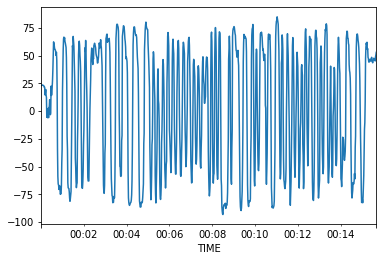

In [ ]:
A1 = df['A1']
A1.plot()

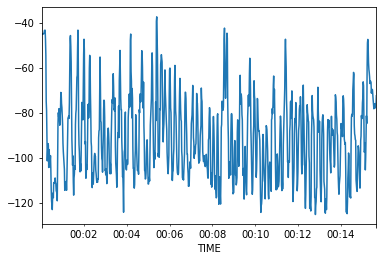

In [ ]:
A2 = df['A2']
A2.plot()

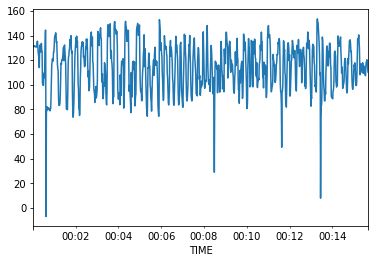

In [ ]:
A3 = df['A3']
A3.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = [[b] for b in df_as_np[i:i+window_size]]
    y.append(label)
  return np.array(X), np.array(y)

##A1 Model Architecture

In [ ]:
WINDOW_SIZE = 1
X1, y1 = df_to_X_y(A1, WINDOW_SIZE)
X1.shape, y1.shape
print(X1)

[[[ 23.149703]]

 [[ 23.149703]]

 [[ 23.640073]]

 [[ 23.640073]]

 [[ 23.468736]]

 [[ 23.296952]]

 [[ 22.952053]]

 [[ 22.778939]]

 [[ 21.554902]]

 [[ 21.695109]]

 [[ 14.671751]]

 [[ 16.679555]]

 [[ 19.598811]]

 [[ 14.611798]]

 [[ 12.303924]]

 [[ -5.285447]]

 [[ -1.091216]]

 [[ -5.877393]]

 [[ -0.859372]]

 [[  2.56377 ]]

 [[ -5.832564]]

 [[  3.233612]]

 [[  4.200622]]

 [[ 10.334503]]

 [[  3.814075]]

 [[ -3.162298]]

 [[ -1.539838]]

 [[ 22.641617]]

 [[ 14.250033]]

 [[ 15.229733]]

 [[ 21.370622]]

 [[ 27.425653]]

 [[ 36.968344]]

 [[ 51.404353]]

 [[ 62.554673]]

 [[ 61.150634]]

 [[ 59.003596]]

 [[ 56.079599]]

 [[ 55.846478]]

 [[ 55.093521]]

 [[ 53.597639]]

 [[ 50.395265]]

 [[ 53.130102]]

 [[ 46.142499]]

 [[ 19.632596]]

 [[-34.176989]]

 [[-58.792136]]

 [[-65.781112]]

 [[-66.405179]]

 [[-70.550075]]

 [[-68.976154]]

 [[-67.255069]]

 [[-71.065875]]

 [[-74.958062]]

 [[-74.228052]]

 [[-74.383362]]

 [[-66.801409]]

 [[-46.557508]]

 [[-34.380345]

In [ ]:
X_train1, y_train1 = X1[:670], y1[:670]
X_val1, y_val1 = X1[670:850], y1[670:850]
X_test1, y_test1 = X1[850:], y1[850:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((670, 1, 1), (670, 1, 1), (180, 1, 1), (180, 1, 1), (89, 1, 1), (89, 1, 1))

In [ ]:
import numpy 
numpy.any(numpy.isnan(y_train1))

False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((1, 1)))
model1.add(LSTM(8))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 8)                 320       
                                                                 
 dense_36 (Dense)            (None, 8)                 72        
                                                                 
 dense_37 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss="MSE", optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

# checkpoint
filepath='/content/best_weights_A1.h5'
cp1 = ModelCheckpoint(filepath, monitor='loss', verbose=2, save_best_only=True,
mode='min')
callbacks = [cp1]

In [ ]:
history = model1.fit(X_train1, y_train1, epochs=50, batch_size=8,validation_data=(X_val1, y_val1),callbacks=[cp1])

Epoch 1/50
84/84 [==============================] - ETA: 0s - loss: 2689.5811 - root_mean_squared_error: 51.8612
Epoch 1: loss improved from inf to 2689.58105, saving model to /content/best_weights_A1.h5
84/84 [==============================] - 3s 11ms/step - loss: 2689.5811 - root_mean_squared_error: 51.8612 - val_loss: 1478.4205 - val_root_mean_squared_error: 38.4502
Epoch 2/50
78/84 [==========================>...] - ETA: 0s - loss: 1086.0778 - root_mean_squared_error: 32.9557
Epoch 2: loss improved from 2689.58105 to 1037.67554, saving model to /content/best_weights_A1.h5
84/84 [==============================] - 0s 6ms/step - loss: 1037.6755 - root_mean_squared_error: 32.2130 - val_loss: 213.2695 - val_root_mean_squared_error: 14.6038
Epoch 3/50
82/84 [============================>.] - ETA: 0s - loss: 187.9946 - root_mean_squared_error: 13.7111
Epoch 3: loss improved from 1037.67554 to 185.74977, saving model to /content/best_weights_A1.h5
84/84 [==============================] - 0

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model(filepath)

##A1 Plotting

In [ ]:
#train_predictions = model1.predict(X_train1).flatten()
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions,'Actuals':y_train1})
#train_results

train_results= pd.DataFrame()
train_predictions = model1.predict(X_train1)
#for i in range(761):
#  df=pd.DataFrame(data={'Train Predictions':[train_predictions[i]],'Actuals':[y_train1[i]]})
#  train_results.append(df, ignore_index=False, verify_integrity=False, sort=False)
train_=pd.DataFrame(train_predictions)
print(type(train_)) 
print(train_)

21/21 [==============================] - 0s 2ms/step
<class 'pandas.core.frame.DataFrame'>
             0
0    24.080185
1    24.080185
2    24.577465
3    24.577465
4    24.403849
..         ...
665  69.284836
666  55.950665
667  21.706009
668  -8.576007
669 -50.343334

[670 rows x 1 columns]


In [ ]:
train_predictions = model1.predict(X_train1)
train_results = pd.DataFrame(data={'Train Predictions':train_predictions[0:670,0]})
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions[0:670,0], 'Actuals':y_train1[0:670,0]})

train_results

21/21 [==============================] - 0s 2ms/step


,Train Predictions
0,24.080185
1,24.080185
2,24.577465
3,24.577465
4,24.403849
...,...
665,69.284836
666,55.950665
667,21.706009
668,-8.576007


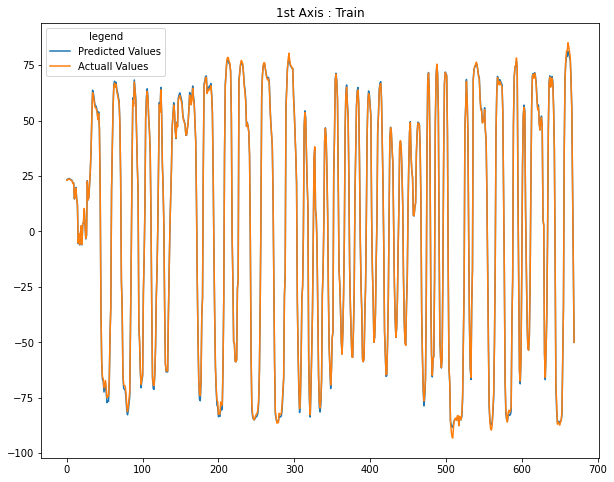

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
plt.title('1st Axis : Train')    

plt.plot(train_results['Train Predictions'][0:670], label='Predicted Values')
plt.plot(y_train1[0:670,0], label='Actuall Values')

plt.legend(
    loc='best',
    fontsize=10,
    title='legend',
    title_fontsize=10)

In [ ]:
val_predictions = model1.predict(X_val1)
#val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
#val_results

val_=pd.DataFrame(train_predictions)
print(type(val_)) 
print(val_)

6/6 [==============================] - 0s 2ms/step
<class 'pandas.core.frame.DataFrame'>
             0
0    23.350998
1    23.350998
2    23.816326
3    23.816326
4    23.654140
..         ...
665  68.275902
666  55.382442
667  21.088602
668  -8.458921
669 -49.983570

[670 rows x 1 columns]


In [ ]:
val_predictions = model1.predict(X_val1)
val_results = pd.DataFrame(data={'Val Predictions':val_predictions[0:180,0]})
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions[0:670,0], 'Actuals':y_train1[0:670,0]})

val_results

6/6 [==============================] - 0s 2ms/step


,Val Predictions
0,-61.244919
1,-56.439159
2,-34.335587
3,43.340687
4,47.241047
...,...
175,-22.856766
176,-23.558777
177,-24.851360
178,-35.200558


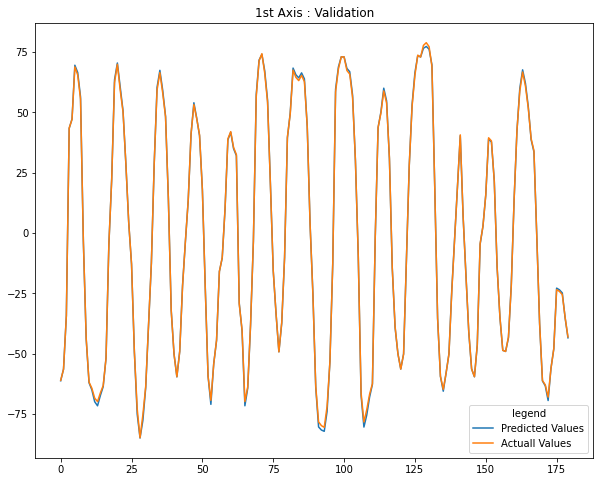

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
plt.title('1st Axis : Validation')    

plt.plot(val_results, label='Predicted Values')
plt.plot(y1[670:850,0], label='Actuall Values')

plt.legend(
    loc='best',
    fontsize=10,
    title='legend',
    title_fontsize=10)

In [ ]:
test_predictions = model1.predict(X_test1)
#test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
#test_results

test_=pd.DataFrame(train_predictions)
print(type(test_)) 
print(test_)


3/3 [==============================] - 0s 3ms/step
<class 'pandas.core.frame.DataFrame'>
             0
0    23.350998
1    23.350998
2    23.816326
3    23.816326
4    23.654140
..         ...
665  68.275902
666  55.382442
667  21.088602
668  -8.458921
669 -49.983570

[670 rows x 1 columns]


In [ ]:
test_predictions = model1.predict(X_test1)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions[0:87,0]})

test_results

3/3 [==============================] - 0s 3ms/step


,Test Predictions
0,-44.602589
1,-41.436096
2,-36.411083
3,-22.066051
4,33.133190
...,...
82,48.060734
83,46.971889
84,47.092670
85,46.290348


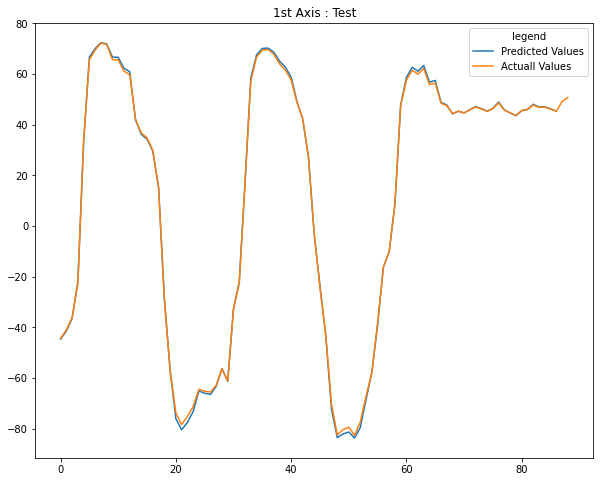

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
plt.title('1st Axis : Test')    

plt.plot(test_results, label='Predicted Values')
plt.plot(y1[850:,0], label='Actuall Values')

plt.legend(
    loc='best',
    fontsize=10,
    title='legend',
    title_fontsize=10)

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/A1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
test_results.to_csv(filepath)

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/A1_train.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
train_results.to_csv(filepath)

##A2 Model Architecture

In [ ]:
WINDOW_SIZE = 1
X1, y1 = df_to_X_y(A2, WINDOW_SIZE)
X1.shape, y1.shape
print(X1)

[[[ -44.869001]]

 [[ -44.709057]]

 [[ -44.840107]]

 [[ -44.91039 ]]

 [[ -44.91039 ]]

 [[ -44.759176]]

 [[ -44.619088]]

 [[ -44.610138]]

 [[ -43.30781 ]]

 [[ -43.12396 ]]

 [[ -43.136416]]

 [[ -47.395624]]

 [[ -54.353686]]

 [[ -74.852862]]

 [[ -78.851452]]

 [[ -89.164076]]

 [[-101.374191]]

 [[ -97.427946]]

 [[ -93.660932]]

 [[ -94.460259]]

 [[-104.313738]]

 [[ -96.310716]]

 [[ -98.85365 ]]

 [[-103.984747]]

 [[-101.313237]]

 [[ -99.049133]]

 [[-105.041746]]

 [[-114.105715]]

 [[-119.172626]]

 [[-121.241   ]]

 [[-123.08003 ]]

 [[-117.126852]]

 [[-115.710096]]

 [[-117.791322]]

 [[-111.185498]]

 [[-111.37626 ]]

 [[-110.80401 ]]

 [[-110.819968]]

 [[-108.978975]]

 [[-111.019714]]

 [[-111.384227]]

 [[-114.741012]]

 [[-114.725879]]

 [[-117.288059]]

 [[-119.159143]]

 [[-100.891272]]

 [[ -84.883511]]

 [[ -79.887049]]

 [[ -81.817278]]

 [[ -78.085411]]

 [[ -82.172741]]

 [[ -85.475423]]

 [[ -81.947669]]

 [[ -79.267438]]

 [[ -70.869125]]

 [[ -71.14

In [ ]:
X_train1, y_train1 = X1[:670], y1[:670]
X_val1, y_val1 = X1[670:850], y1[670:850]
X_test1, y_test1 = X1[850:], y1[850:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((670, 1, 1), (670, 1, 1), (180, 1, 1), (180, 1, 1), (89, 1, 1), (89, 1, 1))

In [ ]:
import numpy 
numpy.any(numpy.isnan(y_train1))

False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((1, 1)))
model1.add(LSTM(8))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 8)                 320       
                                                                 
 dense_38 (Dense)            (None, 8)                 72        
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss="MSE", optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

# checkpoint
filepath='/content/best_weights_A2.h5'
cp1 = ModelCheckpoint(filepath, monitor='loss', verbose=2, save_best_only=True,
mode='min')
callbacks = [cp1]

In [ ]:
history = model1.fit(X_train1, y_train1, epochs=50, batch_size=8,validation_data=(X_val1, y_val1),callbacks=[cp1])

Epoch 1/50
84/84 [==============================] - ETA: 0s - loss: 7523.4180 - root_mean_squared_error: 86.7376
Epoch 1: loss improved from inf to 7523.41797, saving model to /content/best_weights_A2.h5
84/84 [==============================] - 3s 11ms/step - loss: 7523.4180 - root_mean_squared_error: 86.7376 - val_loss: 5340.6797 - val_root_mean_squared_error: 73.0800
Epoch 2/50
82/84 [============================>.] - ETA: 0s - loss: 1860.6925 - root_mean_squared_error: 43.1357
Epoch 2: loss improved from 7523.41797 to 1832.08411, saving model to /content/best_weights_A2.h5
84/84 [==============================] - 0s 6ms/step - loss: 1832.0841 - root_mean_squared_error: 42.8029 - val_loss: 326.0432 - val_root_mean_squared_error: 18.0567
Epoch 3/50
82/84 [============================>.] - ETA: 0s - loss: 347.2746 - root_mean_squared_error: 18.6353
Epoch 3: loss improved from 1832.08411 to 344.75952, saving model to /content/best_weights_A2.h5
84/84 [==============================] - 0

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model(filepath)

##A2 Plotting

In [ ]:
#train_predictions = model1.predict(X_train1).flatten()
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions,'Actuals':y_train1})
#train_results

train_results= pd.DataFrame()
train_predictions = model1.predict(X_train1)
#for i in range(761):
#  df=pd.DataFrame(data={'Train Predictions':[train_predictions[i]],'Actuals':[y_train1[i]]})
#  train_results.append(df, ignore_index=False, verify_integrity=False, sort=False)
train_=pd.DataFrame(train_predictions)
print(type(train_)) 
print(train_)

21/21 [==============================] - 2s 4ms/step
<class 'pandas.core.frame.DataFrame'>
              0
0    -45.732803
1    -45.587868
2    -45.706615
3    -45.770329
4    -45.770329
..          ...
665 -111.339684
666 -109.904930
667 -101.831039
668  -91.679115
669  -86.924187

[670 rows x 1 columns]


In [ ]:
train_predictions = model1.predict(X_train1)
train_results = pd.DataFrame(data={'Train Predictions':train_predictions[0:670,0]})
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions[0:670,0], 'Actuals':y_train1[0:670,0]})

train_results

21/21 [==============================] - 0s 7ms/step


,Train Predictions
0,-45.732803
1,-45.587868
2,-45.706615
3,-45.770329
4,-45.770329
...,...
665,-111.339684
666,-109.904930
667,-101.831039
668,-91.679115


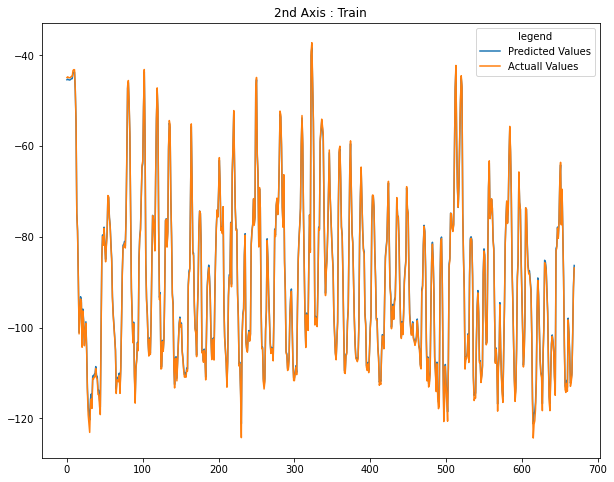

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
plt.title('2nd Axis : Train')    

plt.plot(train_results, label='Predicted Values')
plt.plot(y_train1[0:670,0], label='Actuall Values')

plt.legend(
    loc='best',
    fontsize=10,
    title='legend',
    title_fontsize=10)

In [ ]:
val_predictions = model1.predict(X_val1)
#val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
#val_results

val_=pd.DataFrame(train_predictions)
print(type(val_)) 
print(val_)

6/6 [==============================] - 0s 2ms/step
<class 'pandas.core.frame.DataFrame'>
              0
0    -45.359249
1    -45.203339
2    -45.331066
3    -45.399651
4    -45.399651
..          ...
665 -111.443077
666 -109.924812
667 -101.363014
668  -90.938698
669  -86.287025

[670 rows x 1 columns]


In [ ]:
val_predictions = model1.predict(X_val1)
val_results = pd.DataFrame(data={'Val Predictions':val_predictions[0:180,0]})
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions[0:670,0], 'Actuals':y_train1[0:670,0]})

val_results

6/6 [==============================] - 0s 3ms/step


,Val Predictions
0,-81.006683
1,-83.209267
2,-88.212479
3,-111.481911
4,-113.687546
...,...
175,-74.499634
176,-72.482285
177,-73.778358
178,-77.939056


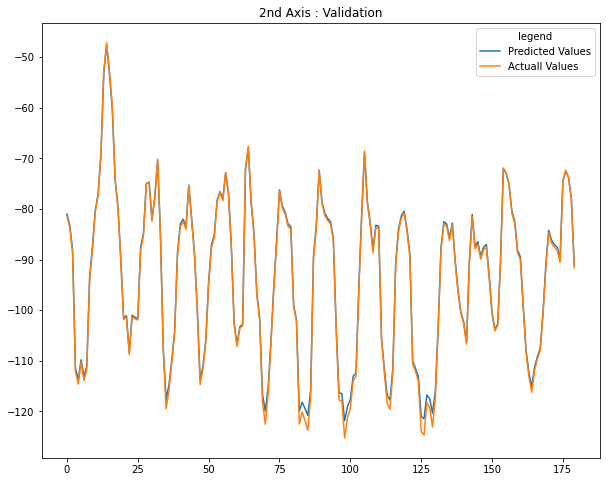

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
plt.title('2nd Axis : Validation')    

plt.plot(val_results, label='Predicted Values')
plt.plot(y1[670:850,0], label='Actuall Values')

plt.legend(
    loc='best',
    fontsize=10,
    title='legend',
    title_fontsize=10)

In [ ]:
test_predictions = model1.predict(X_test1)
#test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
#test_results

test_=pd.DataFrame(train_predictions)
print(type(test_)) 
print(test_)


3/3 [==============================] - 0s 5ms/step
<class 'pandas.core.frame.DataFrame'>
              0
0    -45.359249
1    -45.203339
2    -45.331066
3    -45.399651
4    -45.399651
..          ...
665 -111.443077
666 -109.924812
667 -101.363014
668  -90.938698
669  -86.287025

[670 rows x 1 columns]


In [ ]:
test_predictions = model1.predict(X_test1)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions[0:87,0]})

test_results

3/3 [==============================] - 0s 4ms/step


,Test Predictions
0,-92.463585
1,-93.509247
2,-92.719734
3,-104.081841
4,-120.146469
...,...
82,-77.905655
83,-76.000671
84,-76.114159
85,-75.831696


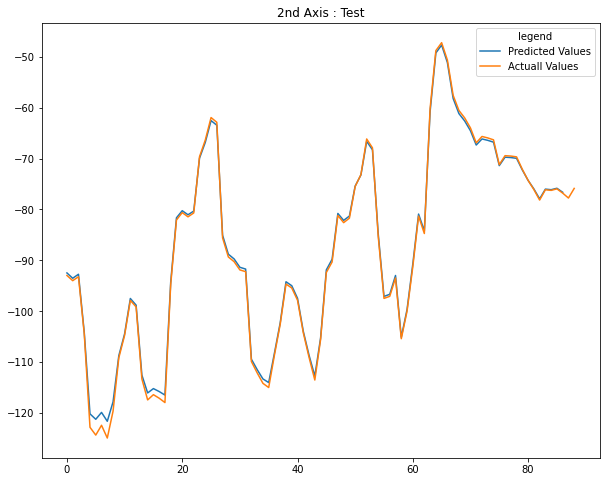

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
plt.title('2nd Axis : Test')    

plt.plot(test_results, label='Predicted Values')
plt.plot(y1[850:,0], label='Actuall Values')

plt.legend(
    loc='best',
    fontsize=10,
    title='legend',
    title_fontsize=10)

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/A2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
test_results.to_csv(filepath)

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/A2_train.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
train_results.to_csv(filepath)

##A3 Model Architecture

In [ ]:
WINDOW_SIZE = 1
X1, y1 = df_to_X_y(A3, WINDOW_SIZE)
X1.shape, y1.shape
print(X1)

[[[131.326399]]

 [[131.059077]]

 [[131.591643]]

 [[131.591643]]

 [[130.969513]]

 [[131.237522]]

 [[131.326399]]

 [[131.237522]]

 [[130.518314]]

 [[130.733117]]

 [[131.017768]]

 [[134.904148]]

 [[135.423838]]

 [[130.492259]]

 [[126.5633  ]]

 [[123.835034]]

 [[123.686291]]

 [[113.942121]]

 [[127.334091]]

 [[132.263067]]

 [[129.890579]]

 [[126.648332]]

 [[132.811631]]

 [[133.636077]]

 [[128.178169]]

 [[126.98733 ]]

 [[101.385224]]

 [[ 99.901326]]

 [[ 99.573349]]

 [[ 99.656308]]

 [[109.531735]]

 [[108.328565]]

 [[105.802021]]

 [[128.739276]]

 [[144.207689]]

 [[144.385769]]

 [[ -6.842105]]

 [[ 77.452175]]

 [[ 79.381363]]

 [[ 82.196131]]

 [[ 81.365301]]

 [[ 79.763526]]

 [[ 81.292426]]

 [[ 81.141082]]

 [[ 80.961969]]

 [[ 80.960743]]

 [[ 79.565897]]

 [[ 78.905646]]

 [[ 80.396523]]

 [[ 80.93505 ]]

 [[ 89.869816]]

 [[103.240697]]

 [[116.078244]]

 [[118.295446]]

 [[121.181869]]

 [[119.079892]]

 [[120.493121]]

 [[126.745014]]

 [[126.745014]

In [ ]:
X_train1, y_train1 = X1[:670], y1[:670]
X_val1, y_val1 = X1[670:850], y1[670:850]
X_test1, y_test1 = X1[850:], y1[850:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((670, 1, 1), (670, 1, 1), (180, 1, 1), (180, 1, 1), (89, 1, 1), (89, 1, 1))

In [ ]:
import numpy 
numpy.any(numpy.isnan(y_train1))

False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((1, 1)))
model1.add(LSTM(8))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 8)                 320       
                                                                 
 dense_40 (Dense)            (None, 8)                 72        
                                                                 
 dense_41 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss="MSE", optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

# checkpoint
filepath='/content/drive/MyDrive/best_weights_A3.h5'
cp1 = ModelCheckpoint(filepath, monitor='loss', verbose=2, save_best_only=True,
mode='min')
callbacks = [cp1]

In [ ]:
history = model1.fit(X_train1, y_train1, epochs=50, batch_size=8,validation_data=(X_val1, y_val1),callbacks=[cp1])

Epoch 1/50
84/84 [==============================] - ETA: 0s - loss: 11578.7266 - root_mean_squared_error: 107.6045
Epoch 1: loss improved from inf to 11578.72656, saving model to /content/drive/MyDrive/best_weights_A3.h5
84/84 [==============================] - 49s 18ms/step - loss: 11578.7266 - root_mean_squared_error: 107.6045 - val_loss: 8411.8613 - val_root_mean_squared_error: 91.7162
Epoch 2/50
83/84 [============================>.] - ETA: 0s - loss: 4397.2046 - root_mean_squared_error: 66.3114
Epoch 2: loss improved from 11578.72656 to 4367.15283, saving model to /content/drive/MyDrive/best_weights_A3.h5
84/84 [==============================] - 1s 6ms/step - loss: 4367.1528 - root_mean_squared_error: 66.0844 - val_loss: 1266.0970 - val_root_mean_squared_error: 35.5823
Epoch 3/50
73/84 [=========================>....] - ETA: 0s - loss: 617.8011 - root_mean_squared_error: 24.8556
Epoch 3: loss improved from 4367.15283 to 585.51630, saving model to /content/drive/MyDrive/best_weight

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model(filepath)

##A3 Plotting

In [ ]:
#train_predictions = model1.predict(X_train1).flatten()
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions,'Actuals':y_train1})
#train_results

train_results= pd.DataFrame()
train_predictions = model1.predict(X_train1)
#for i in range(761):
#  df=pd.DataFrame(data={'Train Predictions':[train_predictions[i]],'Actuals':[y_train1[i]]})
#  train_results.append(df, ignore_index=False, verify_integrity=False, sort=False)
train_=pd.DataFrame(train_predictions)
print(type(train_)) 
print(train_)

21/21 [==============================] - 0s 2ms/step
<class 'pandas.core.frame.DataFrame'>
              0
0    131.037491
1    130.787125
2    131.283676
3    131.283676
4    130.702713
..          ...
665  129.670456
666  111.875626
667   94.976227
668   92.922165
669   94.287132

[670 rows x 1 columns]


In [ ]:
train_predictions = model1.predict(X_train1)
train_results = pd.DataFrame(data={'Train Predictions':train_predictions[0:670,0]})
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions[0:670,0], 'Actuals':y_train1[0:670,0]})

train_results

21/21 [==============================] - 0s 2ms/step


,Train Predictions
0,131.037491
1,130.787125
2,131.283676
3,131.283676
4,130.702713
...,...
665,129.670456
666,111.875626
667,94.976227
668,92.922165


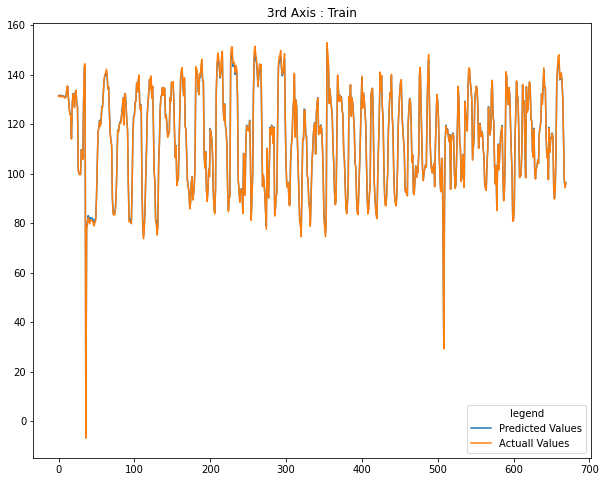

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
plt.title('3rd Axis : Train')    

plt.plot(train_results, label='Predicted Values')
plt.plot(y_train1[0:670,0], label='Actuall Values')

plt.legend(
    loc='best',
    fontsize=10,
    title='legend',
    title_fontsize=10)

In [ ]:
val_predictions = model1.predict(X_val1)
#val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
#val_results

val_=pd.DataFrame(train_predictions)
print(type(val_)) 
print(val_)

6/6 [==============================] - 0s 2ms/step
<class 'pandas.core.frame.DataFrame'>
              0
0    131.489685
1    131.236450
2    131.740387
3    131.740387
4    131.151489
..          ...
665  130.127258
666  114.471550
667   97.326096
668   94.492569
669   96.408508

[670 rows x 1 columns]


In [ ]:
val_predictions = model1.predict(X_val1)
val_results = pd.DataFrame(data={'Val Predictions':val_predictions[0:180,0]})
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions[0:670,0], 'Actuals':y_train1[0:670,0]})

val_results

6/6 [==============================] - 0s 2ms/step


,Val Predictions
0,98.739845
1,100.085602
2,104.472992
3,125.065262
4,120.486755
...,...
175,126.400879
176,127.743050
177,125.807678
178,123.565147


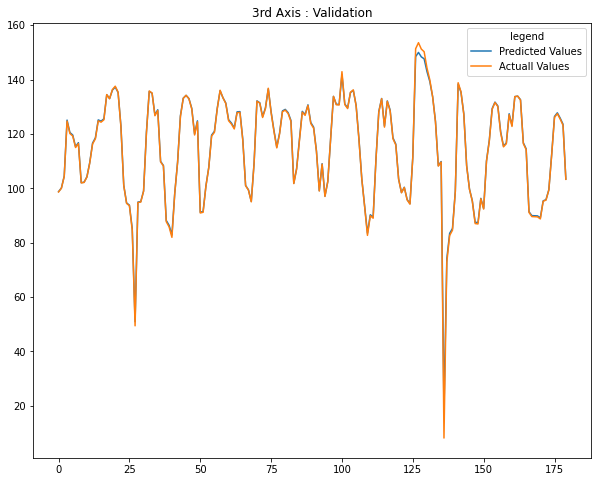

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
plt.title('3rd Axis : Validation')    

plt.plot(val_results, label='Predicted Values')
plt.plot(y1[670:850,0], label='Actuall Values')

plt.legend(
    loc='best',
    fontsize=10,
    title='legend',
    title_fontsize=10)

In [ ]:
test_predictions = model1.predict(X_test1)
#test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
#test_results

test_=pd.DataFrame(train_predictions)
print(type(test_)) 
print(test_)

3/3 [==============================] - 0s 3ms/step
<class 'pandas.core.frame.DataFrame'>
              0
0    131.489685
1    131.236450
2    131.740387
3    131.740387
4    131.151489
..          ...
665  130.127258
666  114.471550
667   97.326096
668   94.492569
669   96.408508

[670 rows x 1 columns]


In [ ]:
test_predictions = model1.predict(X_test1)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions[0:87,0]})

test_results

3/3 [==============================] - 0s 3ms/step


,Test Predictions
0,100.777367
1,98.293381
2,102.644882
3,99.928238
4,124.891991
...,...
82,107.523628
83,115.243240
84,118.799042
85,118.890564


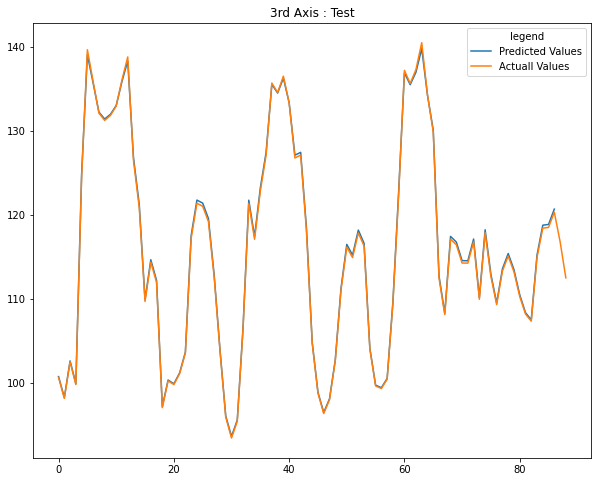

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
plt.title('3rd Axis : Test')    

plt.plot(test_results, label='Predicted Values')
plt.plot(y1[850:,0], label='Actuall Values')

plt.legend(
    loc='best',
    fontsize=10,
    title='legend',
    title_fontsize=10)

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/A3.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
test_results.to_csv(filepath)

In [ ]:
from pathlib import Path  
filepath = Path('/content/drive/MyDrive/A3_train.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
train_results.to_csv(filepath)